# Intro to Bioinformatics
## Homework Assignment 4
## Question 1: Feedback, Robustness & Bifurcation

## Sepehr Torabparhiz
## 93100774

### Developed by Python 3.6

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

import scipy
import scipy.optimize

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sympy as sp
sp.init_printing()

## Finding the initial densities & defining the equations
I use *SymPy* to represent the density change rates in Python.
First, I define the densities by using *symbols*.

In [2]:
X, Y, Z = sp.symbols('X Y Z')


One by one, I find the initial densities. As the system is said to be stable at the start of the experiment, the density change rates should be zero. Also, alpha is 1.6 at the start.

In [3]:
X0 = sp.solve(1 - 1.6 * X)
x0 = X0[0]
x0

Y and Z equations have multiple real and complex solutions. I choose the real solutions as the initial densities.

In [4]:
Y0 = sp.solve(0.5 + 1 / (Y**4 + 1) - 1.6 * Y)
y0 = Y0[0]
Y0

As it can be seen above, there are multiple solutions for the equation. I only use the first one which is real. If there were two solutions that would be a case of bifurcation.

In [5]:
Z0 = sp.solve(0.5 + ( Z**4 / (Z**4 + 1)) - 1.6 * Z)
z0 = Z0[0]
z0

The protein density at each minute is computed by finding the density change in the previous minute and adding that change to the previous density.
Below, I define the functions that compute the density change.

In [6]:
dx = lambda x, alpha: (1 - alpha * x)
dy = lambda y, alpha: (0.5 + 1 / (y**4 + 1) - alpha * y)
dz = lambda z, alpha: (0.5 + (z**4) / (z**4 + 1) - alpha * z) 

The value of alpha in every minute of the 48 hours is generated.

In [7]:
alpha_48 = np.tile(np.concatenate((np.arange(1.6, 0.4, -0.1 / 60)[:-1], np.arange(0.4, 1.6, 0.1 / 60))), 2)


In [8]:
x_densities = [x0]
y_densities = [y0]
z_densities = [z0]


Now, for every minute the density of each protein is calculated. New values are found by adding the density change to the previous density.

But, this method produced bad results for Y densities, so I used SciPy's *fsolve* to actually setting the left side of Y's equation to zero and solving the equation each time.

Also if the density falls below zero in a time step, it is set to zero in the density lists.

In [9]:
%%time
i = 1
for alpha in alpha_48[:2880]:
    prev_x_density = x_densities[i-1]
    prev_y_density = y_densities[i-1]
    prev_z_density = z_densities[i-1]

    new_x_density = prev_x_density + dx(prev_x_density, alpha)
    
    new_y_density = scipy.optimize.fsolve(
        lambda y: 0.5 + 1 / (y**4 + 1) - alpha * y, float(prev_y_density))[0]    
    
    new_z_density = prev_z_density + dz(prev_z_density, alpha)

    x_densities.append(new_x_density)
    y_densities.append(new_y_density)
    z_densities.append(new_z_density)
    
    i += 1
    

CPU times: user 2.48 s, sys: 28.5 ms, total: 2.51 s
Wall time: 2.5 s


In [10]:
# The x values for the plots
minutes = list(range(60*48))

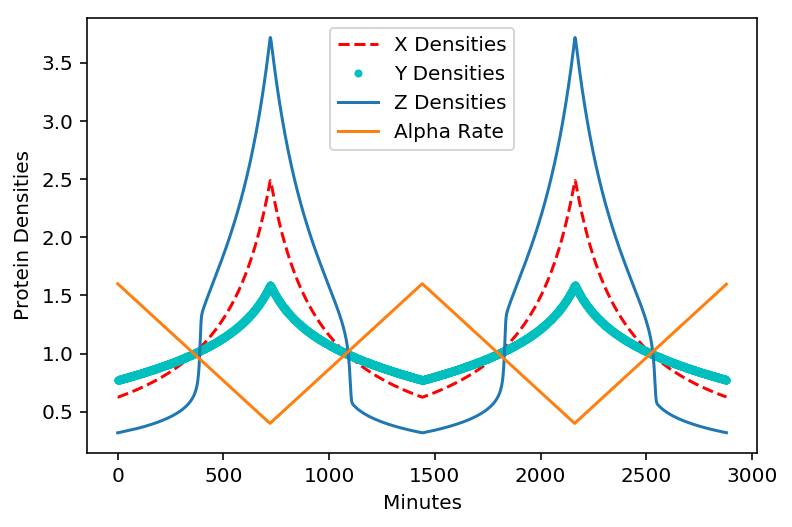

In [11]:
plt.plot(minutes, x_densities[:2880], 'r--', label='X Densities')
plt.plot(minutes, y_densities[:2880], 'c.', label='Y Densities')
plt.plot(minutes, z_densities[:2880], label='Z Densities')
plt.plot(minutes, alpha_48[:2880], label='Alpha Rate')
plt.xlabel('Minutes')
plt.ylabel('Protein Densities')
plt.legend(loc='upper center')
plt.show()

Each protein's density increases as alpha decreases and vice verca.

Z has the highest variance in density while Y changes the least.

### Drawing the density plots
In the previous step, the densities of each protein through the 48 hours are stored in different lists. 
Using these lists and *Seaborn*'s *kdeplot*, the density plot for each protein is drawn.



Text(0.5,1,'X density plot')

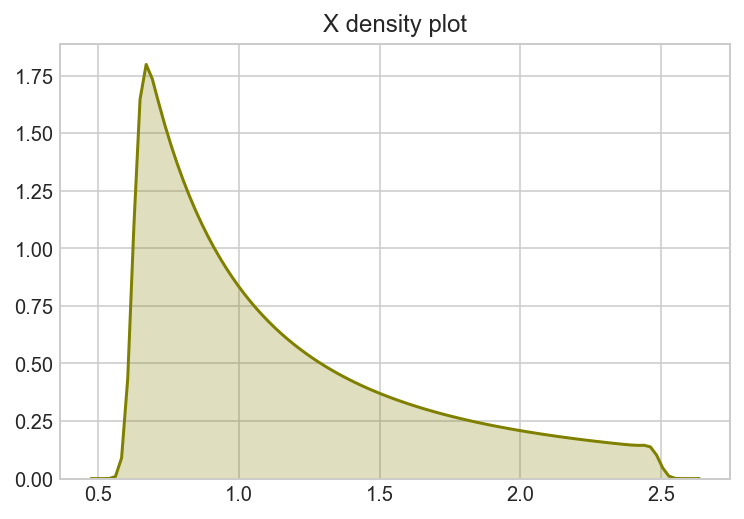

In [12]:
sb.set_style('whitegrid')
sb.kdeplot(np.array(x_densities), shade=True, bw=.05, color="olive").set_title('X density plot')

Text(0.5,1,'Y density plot')

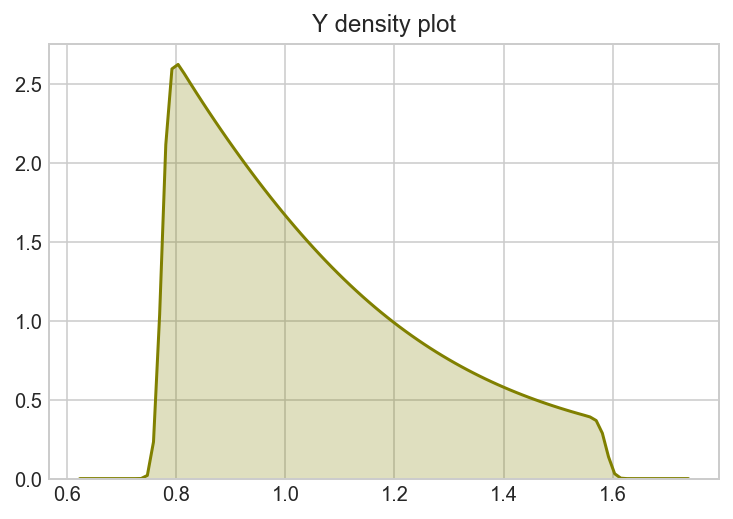

In [13]:
sb.set_style('whitegrid')
sb.kdeplot(np.array(y_densities), shade=True, bw=.05, color="olive").set_title('Y density plot')

Text(0.5,1,'Z density plot')

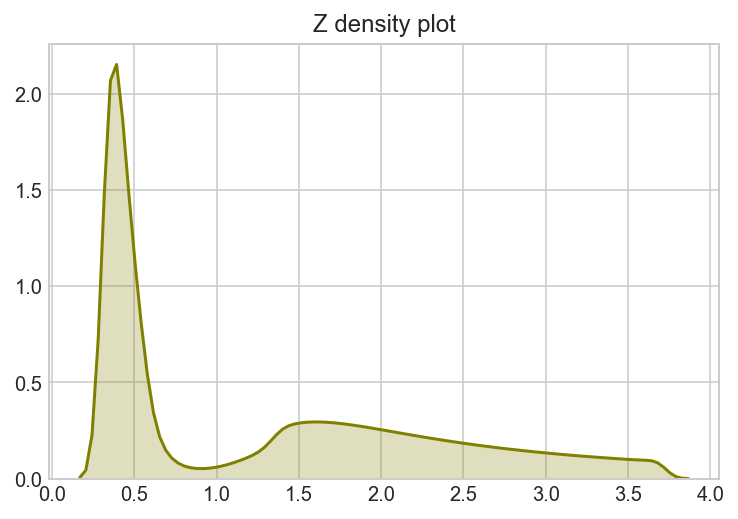

In [14]:
sb.set_style('whitegrid')
sb.kdeplot(np.array(z_densities), shade=True, bw=.05, color="olive").set_title('Z density plot')

Density plots of X and Y are quite similar. X's plot has a steeper slope in the beginning which decrease in higher densities, while Y's plot has a more consistent slope. We can argue that Y is more robust than X and Z.

Compared to other proteins, Z's densities are concentrated in a small range(between 0.2 and 0.7). Z also has the steepest slope among these 3 proteins.